In [288]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
xls = pd.ExcelFile('business impact full.xlsx')
TDS = pd.read_excel(xls, 'Trading Status')
Siteclose = pd.read_excel(xls, 'Site Closure')
Proc = pd.read_excel(xls, 'Procurement')
SC = pd.read_excel(xls, 'Supply Chain Disruption')
GSC = pd.read_excel(xls, 'Global Supply Chain')
WFH = pd.read_excel(xls, 'WFH Model')
safety= pd.read_excel(xls, 'Safety Measures')
workers= pd.read_excel(xls, 'Worker Shortage')
weffects= pd.read_excel(xls, 'worker effects')
spend= pd.read_excel('debit and credit spending raw 2020 2022.xlsx')
sample = pd.read_excel('Business break down.xlsx')


In [403]:
new = pd.ExcelFile('bbusiness effects.xlsx')
FP = pd.read_excel(new, 'Financial Performance')
ImD = pd.read_excel(new, 'Import Disruption')
Stock = pd.read_excel(new, 'Stock Level TS ')
CR= pd.read_excel(new, 'Cash Reserves')
BC = pd.read_excel(new, 'Business Confidence')
fur = pd.read_excel(new, 'Proportion Furloughed TS')


In [404]:
FP.columns = FP.columns.str.replace(' ','_')
ImD.columns = ImD.columns.str.replace(' ','_')
Stock.columns = Stock.columns.str.replace(' ','_')
CR.columns = CR.columns.str.replace(' ','_')
BC.columns = BC.columns.str.replace(' ','_')
fur.columns = fur.columns.str.replace(' ','_')

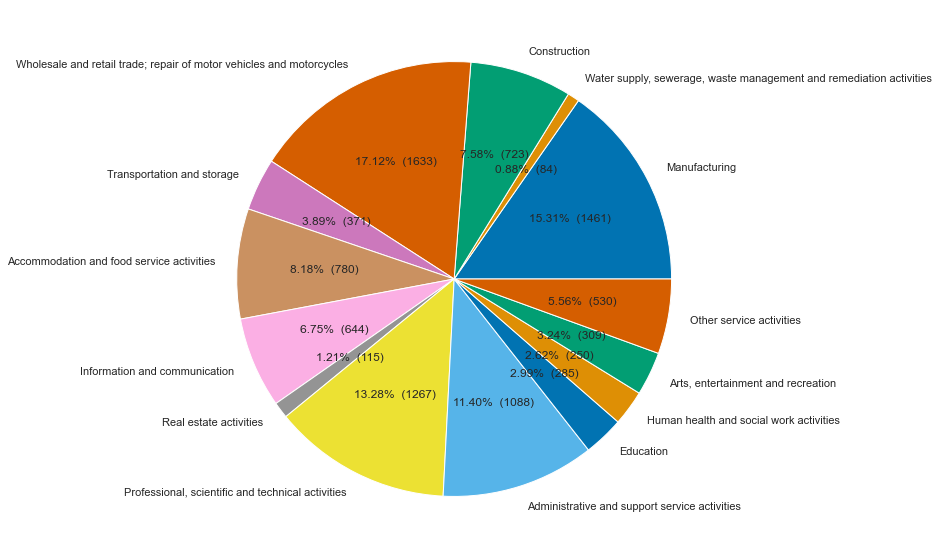

In [405]:
values = sample['Total']
group = sample['Industry']
sns.set(rc = {'figure.figsize':(20,10)}) 
sns.set(font_scale = 1)
palette_color = sns.color_palette('colorblind')
  
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct    
    

plt.pie(values, labels=group, colors=palette_color, autopct=make_autopct(values))
  
plt.show()

In [293]:
TDS.columns = TDS.columns.str.replace(' ','_')

In [294]:
TDS.head()

,Period_Ending_,Wave,Industry/Size_Band,Currently_fully_trading,Currently_partially_trading,Paused_trading_but_intends_to_restart_in_the_next_two_weeks,Paused_trading_and_does_not_intend_to_restart_in_the_next_two_weeks,Has_permanently_ceased_trading_,Currently_trading_and_has_been_for_more_than_the_last_two_weeks_,Started_trading_within_the_last_two_weeks_after_a_pause_in_trading_
0,2022-04-17,Wave 54,Manufacturing,0.855,0.114,0,0.031,[c],NaN,NaN
1,2022-04-17,Wave 54,"Water supply, sewerage, waste management and r...",[c],[c],[c],[c],[c],NaN,NaN
2,2022-04-17,Wave 54,Construction,0.885,0.067,0,0.041,[c],NaN,NaN
3,2022-04-17,Wave 54,Wholesale and retail trade; repair of motor ve...,0.893,0.064,0.014,0.015,0.014,NaN,NaN
4,2022-04-17,Wave 54,Transportation and storage,0.61,0.269,0,0,0.121,NaN,NaN


In [295]:
TDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Period_Ending_                                                       1008 non-null   datetime64[ns]
 1   Wave                                                                 1008 non-null   object        
 2   Industry/Size_Band                                                   1008 non-null   object        
 3   Currently_fully_trading                                              294 non-null    object        
 4   Currently_partially_trading                                          294 non-null    object        
 5   Paused_trading_but_intends_to_restart_in_the_next_two_weeks          1008 non-null   object        
 6   Paused_trading_and_does_not_intend_to_restart_in

In [296]:
TDS['Industry/Size_Band'].unique()

array(['Manufacturing',
       'Water supply, sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade; repair of motor vehicles and motorcycles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities', 'Education',
       'Human health and social work activities',
       'Arts, entertainment and recreation', 'Other service activities',
       '0 - 9', '10 - 49', '50 - 99', '100 -249', '250 +',
       'All size bands excluding 0 - 9', 'All businesses'], dtype=object)

In [297]:

TDS = TDS[TDS.Paused_trading_but_intends_to_restart_in_the_next_two_weeks != "[c]"]
TDS = TDS[TDS.Has_permanently_ceased_trading_ != "[c]"]
TDS.head()

,Period_Ending_,Wave,Industry/Size_Band,Currently_fully_trading,Currently_partially_trading,Paused_trading_but_intends_to_restart_in_the_next_two_weeks,Paused_trading_and_does_not_intend_to_restart_in_the_next_two_weeks,Has_permanently_ceased_trading_,Currently_trading_and_has_been_for_more_than_the_last_two_weeks_,Started_trading_within_the_last_two_weeks_after_a_pause_in_trading_
3,2022-04-17,Wave 54,Wholesale and retail trade; repair of motor ve...,0.893,0.064,0.014,0.015,0.014,NaN,NaN
4,2022-04-17,Wave 54,Transportation and storage,0.61,0.269,0,0,0.121,NaN,NaN
7,2022-04-17,Wave 54,Real estate activities,0.924,0.038,0,0.038,0,NaN,NaN
9,2022-04-17,Wave 54,Administrative and support service activities,0.828,0.121,0,0.031,0.019,NaN,NaN
11,2022-04-17,Wave 54,Human health and social work activities,0.814,0.126,0,0.061,0,NaN,NaN


In [298]:
TDS['Paused_trading_but_intends_to_restart_in_the_next_two_weeks'].astype(str).astype(float)
TDS['Has_permanently_ceased_trading_'].astype(str).astype(float)
TDS['Industry/Size_Band'].astype(str)

3       Wholesale and retail trade; repair of motor ve...
4                              Transportation and storage
7                                  Real estate activities
9           Administrative and support service activities
11                Human health and social work activities
                              ...                        
993     Wholesale and retail trade; repair of motor ve...
996                         Information and communication
999         Administrative and support service activities
1002                   Arts, entertainment and recreation
1003                             Other service activities
Name: Industry/Size_Band, Length: 539, dtype: object

In [299]:
keep = TDS[(TDS['Industry/Size_Band']!= 'Manufacturing') & 
           (TDS['Industry/Size_Band']!= 'Construction') &
           (TDS['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
           (TDS['Industry/Size_Band']!= 'Accommodation and food service activities') &
           (TDS['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
           (TDS['Industry/Size_Band']!= 'Administrative and support service activities') &
           (TDS['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
           (TDS['Industry/Size_Band']!= "Other service activities")].index

   
TDS = TDS.drop(keep , inplace=False)  

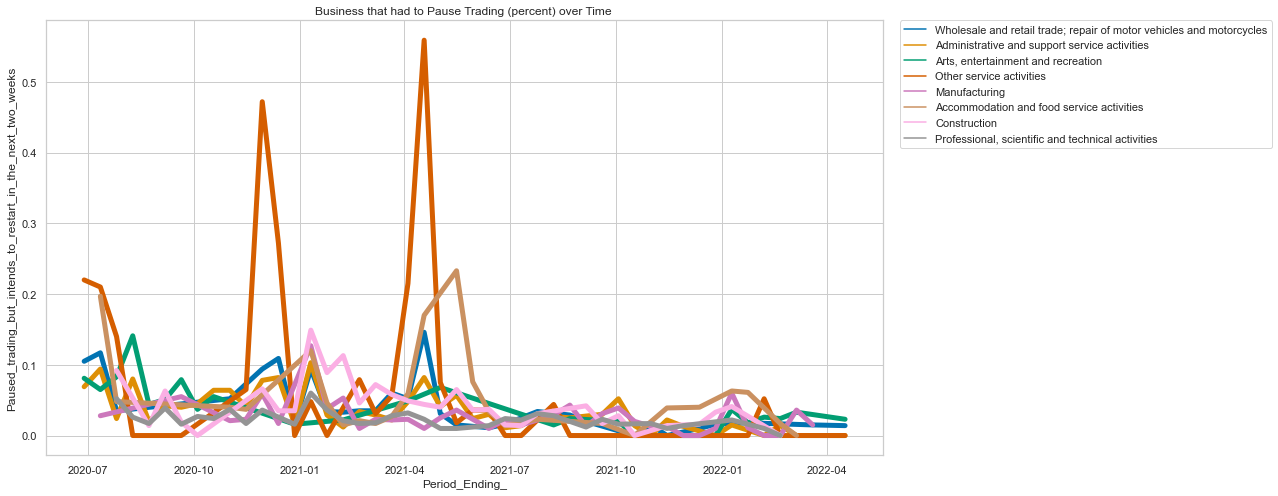

In [300]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1)
sns.set_style("whitegrid")
sns.lineplot(data=TDS, x='Period_Ending_', y='Paused_trading_but_intends_to_restart_in_the_next_two_weeks', hue='Industry/Size_Band', palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title='Business that had to Pause Trading (percent) over Time ')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [302]:
SC.columns = SC.columns.str.replace(' ','_')

In [303]:
SC['Industry/Size_band'].astype(str)

0                                          Manufacturing
1      Water supply, sewerage, waste management and r...
2                                           Construction
3      Wholesale and retail trade; repair of motor ve...
4                             Transportation and storage
                             ...                        
142                                              50 - 99
143                                             100 -249
144                                                250 +
145                       All size bands excluding 0 - 9
146                                       All businesses
Name: Industry/Size_band, Length: 147, dtype: object

In [304]:
keep = SC[(SC['Industry/Size_band']!= 'Manufacturing') &
          (SC['Industry/Size_band']!= 'Construction') &
          (SC['Industry/Size_band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (SC['Industry/Size_band']!= 'Accommodation and food service activities') &
          (SC['Industry/Size_band']!= 'Professional, scientific and technical activities') &
          (SC['Industry/Size_band']!= 'Administrative and support service activities') &
          (SC['Industry/Size_band']!= 'Arts, entertainment and recreation') &
          (SC['Industry/Size_band']!= "Other service activities")].index

SC = SC.drop(keep,inplace=False) 

In [305]:
SC = SC[SC.No_disruption != "[c]"]

In [306]:
SC['With_disruptions'] = 1 - SC['No_disruption']

In [307]:
SC.head()

,Date,Wave,Trading_Status,Industry/Size_band,Major_disruption,Moderate_disruption,Minor_disruption,No_disruption,Not_sure,With_disruptions
0,2022-03-31,Wave 54,Not permanently stopped trading,Manufacturing,0.074,0.271,0.327,0.247,0.081,0.753
2,2022-03-31,Wave 54,Not permanently stopped trading,Construction,0.032,0.187,0.254,0.342,0.184,0.658
3,2022-03-31,Wave 54,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.061,0.249,0.242,0.312,0.136,0.688
5,2022-03-31,Wave 54,Not permanently stopped trading,Accommodation and food service activities,0.022,0.231,0.28,0.298,0.169,0.702
8,2022-03-31,Wave 54,Not permanently stopped trading,"Professional, scientific and technical activities",0.012,0.067,0.116,0.727,0.078,0.273


In [308]:
scgroup = SC.groupby(['Industry/Size_band', 'Date'], group_keys= False).mean()

C:\Users\Grace.Keen\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [309]:
scgroup = scgroup.reset_index(level=0)

In [310]:
scgroup = scgroup.reset_index(level=0)

In [311]:
scgroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                17 non-null     datetime64[ns]
 1   Industry/Size_band  17 non-null     object        
 2   Minor_disruption    17 non-null     float64       
 3   No_disruption       17 non-null     float64       
 4   With_disruptions    17 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 808.0+ bytes


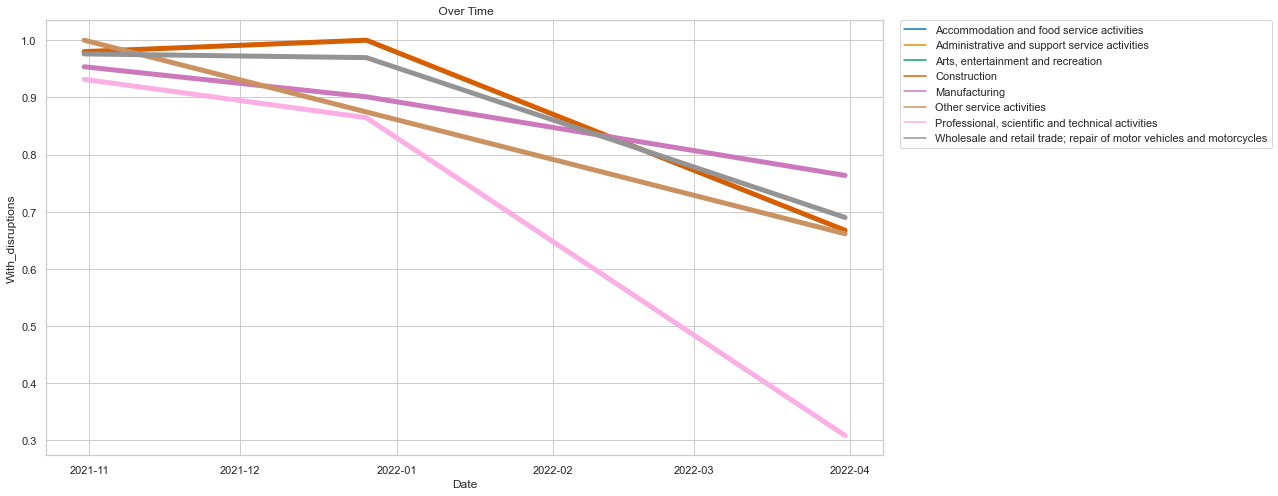

In [312]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=scgroup, x='Date', y='With_disruptions', hue='Industry/Size_band', palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title=" Over Time")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [313]:
workers.columns = workers.columns.str.replace(' ','_')

In [314]:
workers = workers[workers.Yes != "[c]"]

In [315]:
workers.head()

,Dates,Wave,Industry/Size_Band,Yes,No,Not_sure,Not_applicable
0,2022-04-17,Wave 54,Manufacturing,0.114,0.709,0.022,0.155
2,2022-04-17,Wave 54,Construction,0.172,0.576,0.084,0.168
3,2022-04-17,Wave 54,Wholesale and retail trade; repair of motor ve...,0.143,0.627,0.051,0.179
4,2022-04-17,Wave 54,Transportation and storage,0.066,0.551,0.039,0.344
5,2022-04-17,Wave 54,Accommodation and food service activities,0.37,0.438,0.07,0.122


In [316]:
keep = workers[(workers['Industry/Size_Band']!= 'Manufacturing') &
          (workers['Industry/Size_Band']!= 'Construction') &
          (workers['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (workers['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (workers['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (workers['Industry/Size_Band']!= 'Administrative and support service activities') &
          (workers['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (workers['Industry/Size_Band']!= "Other service activities")].index

workers = workers.drop(keep,inplace=False) 

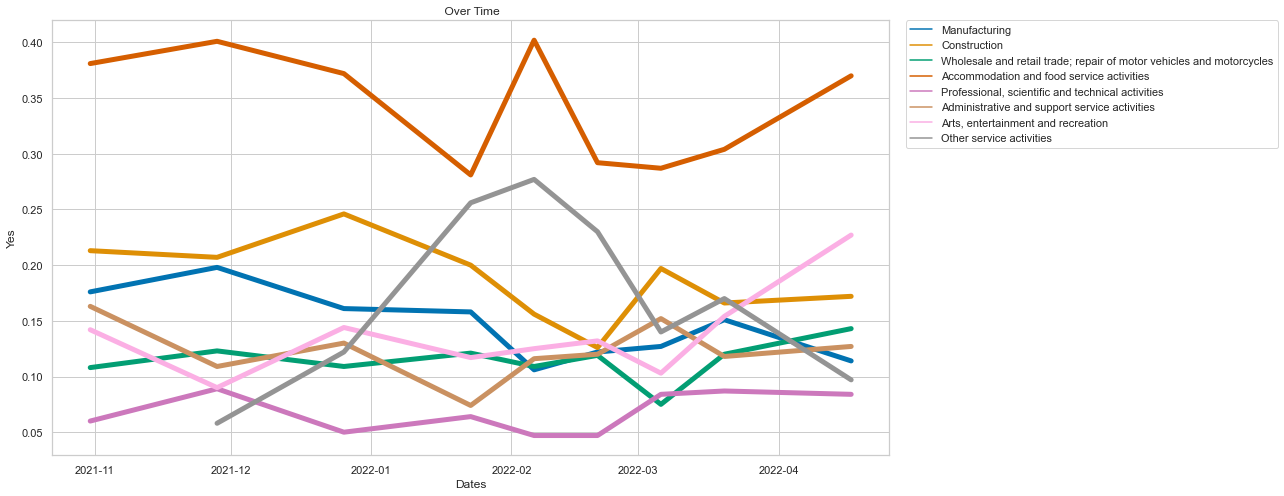

In [317]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=workers, x='Dates', y='Yes', hue='Industry/Size_Band', palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title=" Over Time")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [318]:
WFH.columns = WFH.columns.str.replace(' ','_')

In [319]:
WFH.head()

,Dates,Wave,Industry/Size_Band,Yes_,No_,Not_sure,Not_applicable
0,2022-04-17,Wave 54,Manufacturing,0.198,0.511,0.07,0.221
1,2022-04-17,Wave 54,"Water supply, sewerage, waste management and r...",[c],[c],[c],[c]
2,2022-04-17,Wave 54,Construction,0.052,0.601,0.059,0.289
3,2022-04-17,Wave 54,Wholesale and retail trade; repair of motor ve...,0.143,0.466,0.092,0.299
4,2022-04-17,Wave 54,Transportation and storage,0.113,0.408,0.159,0.321


In [320]:
WFH = WFH[WFH.Yes_ != "[c]"]

In [321]:
keep = WFH[(WFH['Industry/Size_Band']!= 'Manufacturing') &
          (WFH['Industry/Size_Band']!= 'Construction') &
          (WFH['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (WFH['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (WFH['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (WFH['Industry/Size_Band']!= 'Administrative and support service activities') &
          (WFH['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (WFH['Industry/Size_Band']!= "Other service activities")].index

WFH = WFH.drop(keep, inplace=False) 

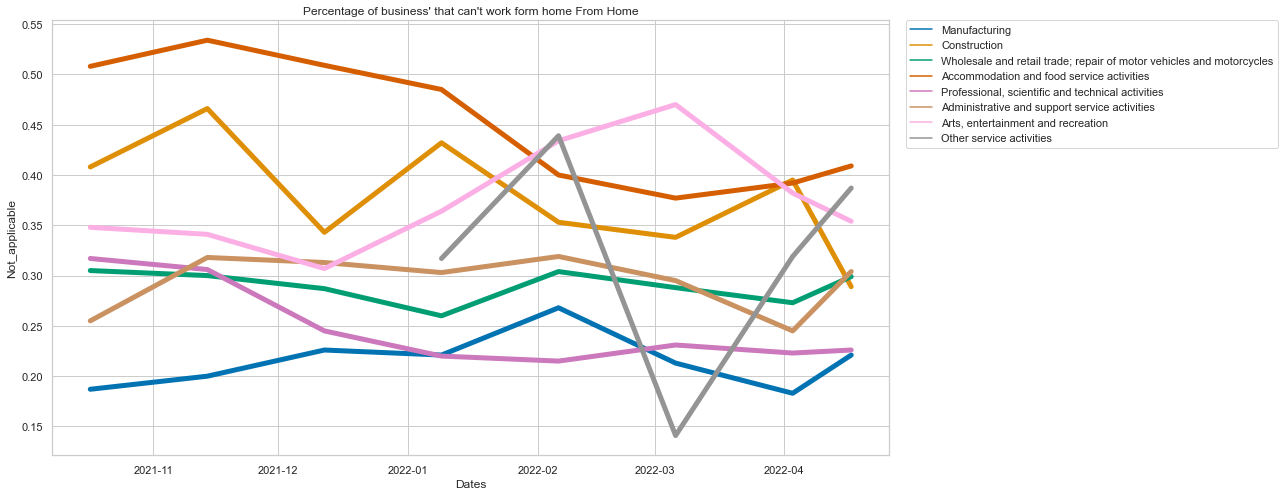

In [322]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=WFH, x='Dates', y='Not_applicable', hue='Industry/Size_Band', palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="Percentage of business' that can't work form home From Home")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [323]:
IMC= pd.read_excel('Import Challenges.xlsx') 

In [324]:
IMC.columns = IMC.columns.str.replace(' ','_')

In [325]:
IMC.head()

,Date,Wave,Trading_Status,Industry/Size_Band,Coronavirus_pandemic,End_of_the_EU_transition_period,Coronavirus_(COVID-19)_pandemic_and_the_end_of_the_EU_transition_period,Other,Not_sure
0,2022-03-31,Wave 54,Not permanently stopped trading,Manufacturing,0.095,0.47,0.305,0.065,0.065
1,2022-03-31,Wave 54,Not permanently stopped trading,"Water supply, sewerage, waste management and r...",[c],[c],[c],[c],[c]
2,2022-03-31,Wave 54,Not permanently stopped trading,Construction,[c],[c],[c],[c],[c]
3,2022-03-31,Wave 54,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.103,0.46,0.253,0.08,0.104
4,2022-03-31,Wave 54,Not permanently stopped trading,Transportation and storage,[c],[c],[c],[c],[c]


In [391]:
keep = FP[(FP['Industry/Size_Band']!= 'Manufacturing') &
          (FP['Industry/Size_Band']!= 'Construction') &
          (FP['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (FP['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (FP['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (FP['Industry/Size_Band']!= 'Administrative and support service activities') &
          (FP['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (FP['Industry/Size_Band']!= "Other service activities")].index

FP = FP.drop(keep,inplace=False) 

In [392]:
FP.head()

,Date,Wave,Industry/Size_Band,Turnover_has_increased_by_more_than_50%,Turnover_has_increased_between_20%_and_50%,Turnover_has_increased_by_up_to_20%,Turnover_unaffected,Turnover_has_decreased_by_up_to_20,Turnover_has_decreased_between_20_and_50,Turnover_has_decreased_by_more_than_50,Not_sure_
0,2021-09-05,Wave 39,Manufacturing,[c],0.054,0.041,0.488,0.139,0.087,0.069,0.117
2,2021-09-05,Wave 39,Construction,[c],[c],0.048,0.469,0.126,0.085,0.031,0.225
3,2021-09-05,Wave 39,Wholesale and retail trade; repair of motor ve...,[c],0.014,0.067,0.452,0.149,0.067,0.054,0.196
5,2021-09-05,Wave 39,Accommodation and food service activities,0,0.058,0.061,0.394,0.169,0.128,0.064,0.125
8,2021-09-05,Wave 39,"Professional, scientific and technical activities",0.018,[c],0.027,0.635,0.075,0.087,0.052,0.101


In [393]:
FP = FP[FP.Turnover_has_decreased_by_up_to_20 != "[c]"]
FP = FP[FP.Turnover_has_decreased_between_20_and_50 != "[c]"]
FP = FP[FP.Turnover_has_decreased_by_more_than_50 != "[c]"]

In [398]:
FP['Turnover_has_decreased']  = FP['Turnover_has_decreased_by_more_than_50'] + FP['Turnover_has_decreased_between_20_and_50']+FP['Turnover_has_decreased_by_up_to_20']

In [400]:
FP['Industry/Size_Band'].unique()

array(['Manufacturing', 'Construction',
       'Wholesale and retail trade; repair of motor vehicles and motorcycles',
       'Accommodation and food service activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Arts, entertainment and recreation', 'Other service activities'],
      dtype=object)

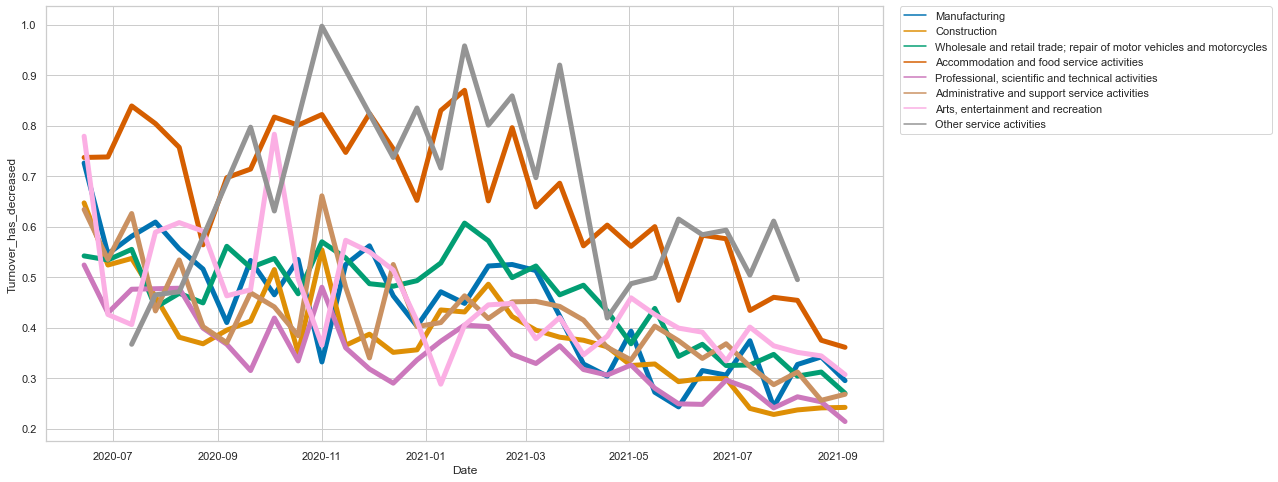

In [401]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=FP, x='Date', y='Turnover_has_decreased', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [339]:
keep = ImD[(ImD['Industry/Size_Band']!= 'Manufacturing') &
          (ImD['Industry/Size_Band']!= 'Construction') &
          (ImD['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (ImD['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (ImD['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (ImD['Industry/Size_Band']!= 'Administrative and support service activities') &
          (ImD['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (ImD['Industry/Size_Band']!= "Other service activities")].index

ImD = ImD.drop(keep,inplace=False) 

In [340]:
ImD.head()

,Date,Wave,Trading_Status,Industry/Size_Band,Severe_disruption,Moderate_disruption,Low_disruption,No_disruption,Not_sure
0,2021-09-05,Wave 39,Not permanently stopped trading,Manufacturing,0.18,0.36,0.451,[c],[c]
2,2021-09-05,Wave 39,Not permanently stopped trading,Construction,0.023,0.878,0.095,[c],0
3,2021-09-05,Wave 39,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.178,0.235,0.499,0.084,[c]
5,2021-09-05,Wave 39,Not permanently stopped trading,Accommodation and food service activities,0.402,0.356,0.204,0.038,0
8,2021-09-05,Wave 39,Not permanently stopped trading,"Professional, scientific and technical activities",[c],0.485,0.181,0.326,[c]


In [341]:
ImD = ImD[ImD.Severe_disruption != "[c]"]
ImD = ImD[ImD.Moderate_disruption != "[c]"]
ImD = ImD[ImD.Low_disruption != "[c]"]

In [342]:
ImDG = ImD.groupby(['Industry/Size_Band', 'Date'], group_keys= False).mean()

C:\Users\Grace.Keen\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [343]:
ImDG = ImDG.reset_index(level=0)

In [344]:
ImDG = ImDG.reset_index(level=0)

In [345]:
ImDG.head()

,Date,Industry/Size_Band,Severe_disruption,Moderate_disruption,Low_disruption
0,2021-01-10,Accommodation and food service activities,0.072,0.455,0.397
1,2021-01-24,Accommodation and food service activities,0.693,0.105,0.139
2,2021-02-07,Accommodation and food service activities,0.014,0.129,0.808
3,2021-02-21,Accommodation and food service activities,0.000,0.509,0.361
4,2021-03-07,Accommodation and food service activities,0.282,0.506,0.212


In [346]:
ImDG['Import_Disruption'] = ImDG['Low_disruption'] + ImDG['Moderate_disruption'] + ImDG['Severe_disruption'] 

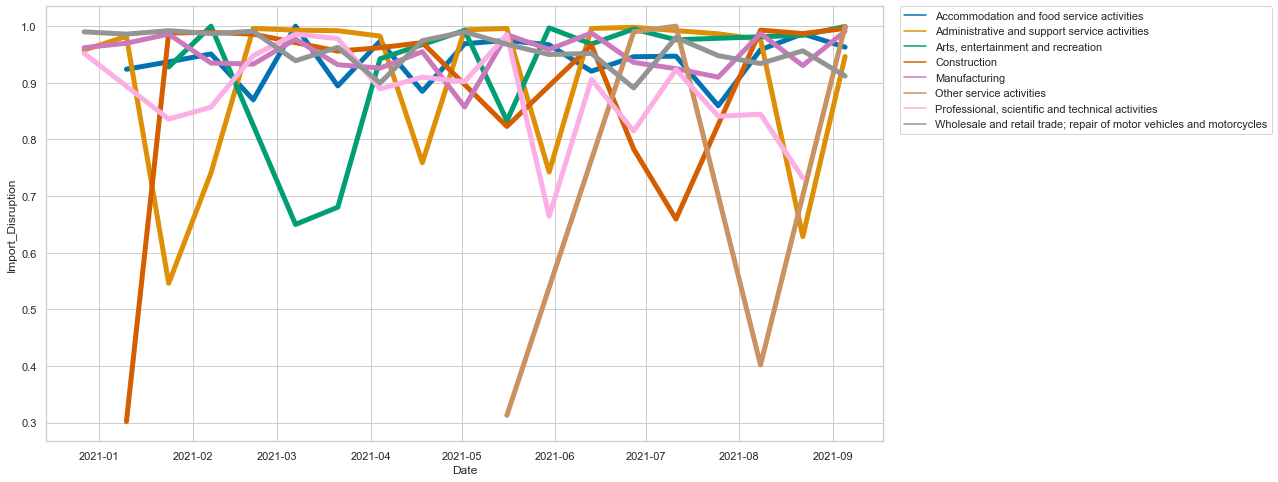

In [347]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=ImDG, x='Date', y='Import_Disruption', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [348]:
keep = Stock[(Stock['Industry/Size_Band']!= 'Manufacturing') &
          (Stock['Industry/Size_Band']!= 'Construction') &
          (Stock['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (Stock['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (Stock['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (Stock['Industry/Size_Band']!= 'Administrative and support service activities') &
          (Stock['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (Stock['Industry/Size_Band']!= "Other service activities")].index

Stock = Stock.drop(keep,inplace=False) 

In [349]:
Stock.head()

,Date,Wave,Trading_Status,Industry/Size_Band,Stock_levels_are_higher_than_normal,Stock_levels_have_not_changed_,Stock_levels_are_lower_than_normal_,Not_sure,Not_applicable_
0,2021-09-05,Wave 39,Not permanently stopped trading,Manufacturing,0.146,0.405,0.177,0.03,0.243
2,2021-09-05,Wave 39,Not permanently stopped trading,Construction,0.028,0.276,0.104,0.079,0.513
3,2021-09-05,Wave 39,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.128,0.372,0.227,0.118,0.154
5,2021-09-05,Wave 39,Not permanently stopped trading,Accommodation and food service activities,0.029,0.465,0.295,0.098,0.113
8,2021-09-05,Wave 39,Not permanently stopped trading,"Professional, scientific and technical activities",0.012,0.103,0.017,0.025,0.844


In [350]:
Stock = Stock[Stock.Stock_levels_are_lower_than_normal_ != "[c]"]


In [351]:
Stockg = Stock.groupby(['Industry/Size_Band', 'Date'], group_keys= False).mean()

C:\Users\Grace.Keen\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [352]:
Stockg = Stockg.reset_index(level=0)

In [353]:
Stockg = Stockg.reset_index(level=0)

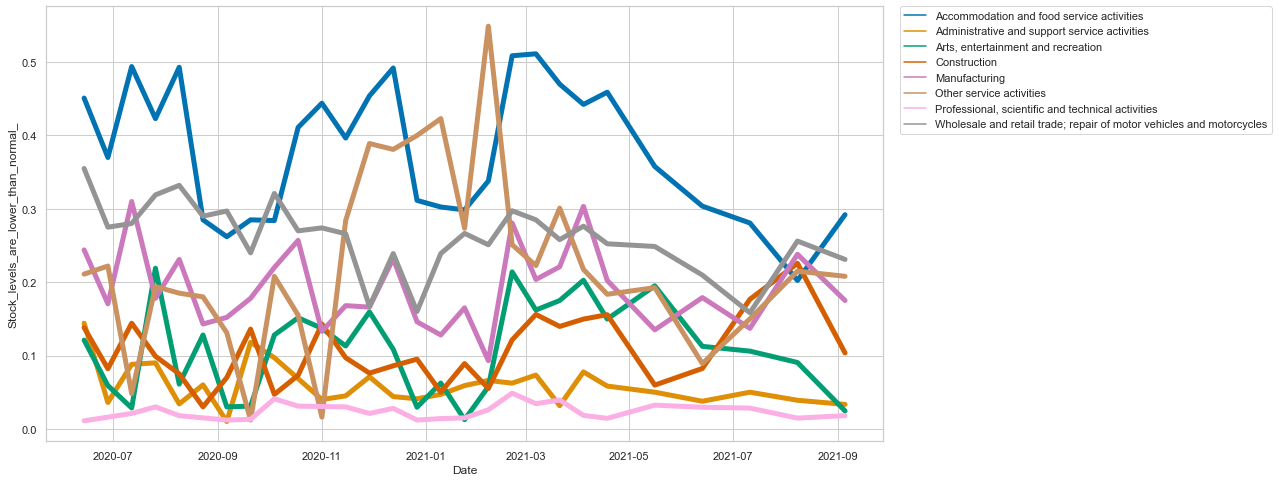

In [354]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=Stockg, x='Date', y='Stock_levels_are_lower_than_normal_', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [355]:
keep = CR[(CR['Industry/Size_Band']!= 'Manufacturing') &
          (CR['Industry/Size_Band']!= 'Construction') &
          (CR['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (CR['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (CR['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (CR['Industry/Size_Band']!= 'Administrative and support service activities') &
          (CR['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (CR['Industry/Size_Band']!= "Other service activities")].index

CR = CR.drop(keep,inplace=False) 

In [356]:
CR.head()

,Date,Wave,Trading_Status,Industry/Size_Band,No_cash_reserves_,Less_than_1_month_,1_to_3_months_,4_to_6_months,More_than_6_months_,Not_sure
0,2021-09-19,Wave 39,Not permanently stopped trading,Manufacturing,0.131,0.034,0.29,0.134,0.217,0.194
2,2021-09-19,Wave 39,Not permanently stopped trading,Construction,0.125,0.049,0.254,0.096,0.227,0.25
3,2021-09-19,Wave 39,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.089,0.042,0.22,0.114,0.266,0.269
5,2021-09-19,Wave 39,Not permanently stopped trading,Accommodation and food service activities,0.106,0.074,0.265,0.111,0.161,0.285
8,2021-09-19,Wave 39,Not permanently stopped trading,"Professional, scientific and technical activities",0.059,0.015,0.234,0.172,0.348,0.171


In [357]:
CR = CR[CR.No_cash_reserves_ != "[c]"]

In [358]:
CRG = CR.groupby(['Industry/Size_Band', 'Date'], group_keys= False).mean()

C:\Users\Grace.Keen\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [359]:
CRG = CRG.reset_index(level=0)

In [360]:
CRG = CRG.reset_index(level=0)

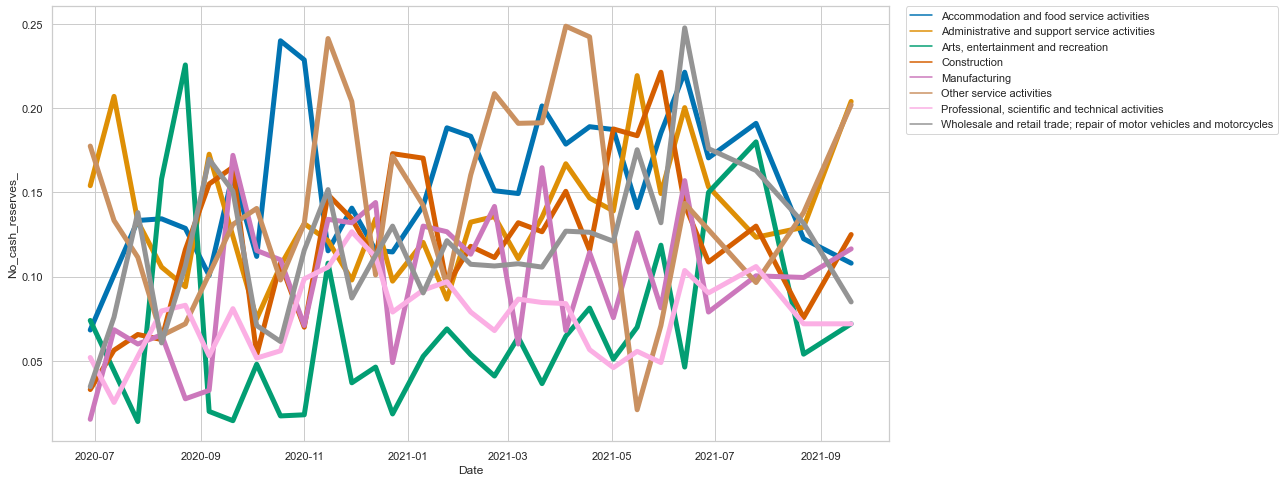

In [361]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=CRG, x='Date', y='No_cash_reserves_', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [362]:
keep = fur[(fur['Industry/Size_Band']!= 'Manufacturing') &
          (fur['Industry/Size_Band']!= 'Construction') &
          (fur['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (fur['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (fur['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (fur['Industry/Size_Band']!= 'Administrative and support service activities') &
          (fur['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (fur['Industry/Size_Band']!= "Other service activities")].index

fur = fur.drop(keep,inplace=False) 

In [363]:
fur.head()

,Date,Wave,Trading_Status,Industry/Size_Band,On_full_or_partial_furlough_leave_,Made_permanently_redundant_,Mainly_working_at_the_same_place_they_were_working_before_the_pandemic,"Mainly_working_from_home,_instead_of_where_they_were_working_before_the_pandemic","On_sick_leave_or_not_working_due_to_coronavirus_(COVID-19)_symptoms,_self-isolation_or_quarantine",Other_,Working_at_their_normal_place_of_work_,Working_remotely_instead_of_at_their_normal_place_of_work_,Off_sick_or_in_self-isolation_due_to_coronavirus_(COVID-19)_with_statutory_or_company_pay,Working_remotely_or_at_their_normal_place_of_work
0,2021-09-05,Wave 39,Not permanently stopped trading,Manufacturing,0.055,[c],0.794,0.109,0.01,0.03,NaN,NaN,NaN,NaN
2,2021-09-05,Wave 39,Not permanently stopped trading,Construction,0.054,0,0.765,0.071,[c],0.106,NaN,NaN,NaN,NaN
3,2021-09-05,Wave 39,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.033,[c],0.747,0.165,[c],0.044,NaN,NaN,NaN,NaN
5,2021-09-05,Wave 39,Not permanently stopped trading,Accommodation and food service activities,0.08,[c],0.836,0.033,[c],0.043,NaN,NaN,NaN,NaN
8,2021-09-05,Wave 39,Not permanently stopped trading,"Professional, scientific and technical activities",0.056,[c],0.521,0.371,[c],0.047,NaN,NaN,NaN,NaN


In [364]:
fur = fur[fur.On_full_or_partial_furlough_leave_ != "[c]"]
fur = fur[fur.Made_permanently_redundant_ != "[c]"]

In [367]:
fur['On_full_or_partial_furlough_leave_'] = fur['On_full_or_partial_furlough_leave_'].astype(str).astype(float)
fur['Made_permanently_redundant_']=fur['Made_permanently_redundant_'].astype(str).astype(float)

In [368]:
fur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 2 to 2071
Data columns (total 14 columns):
 #   Column                                                                                             Non-Null Count  Dtype         
---  ------                                                                                             --------------  -----         
 0   Date                                                                                               255 non-null    datetime64[ns]
 1   Wave                                                                                               255 non-null    object        
 2   Trading_Status                                                                                     255 non-null    object        
 3   Industry/Size_Band                                                                                 255 non-null    object        
 4   On_full_or_partial_furlough_leave_                                             

In [369]:
furg = fur.groupby(['Industry/Size_Band', 'Date'], group_keys= False).mean()

In [370]:
furg = furg.reset_index(level=0)

In [371]:
furg = furg.reset_index(level=0)

In [372]:
furg.head()

,Date,Industry/Size_Band,On_full_or_partial_furlough_leave_,Made_permanently_redundant_,Off_sick_or_in_self-isolation_due_to_coronavirus_(COVID-19)_with_statutory_or_company_pay
0,2020-06-14,Accommodation and food service activities,0.772000,0.025500,NaN
1,2020-06-28,Accommodation and food service activities,0.712500,0.017000,NaN
2,2020-07-12,Accommodation and food service activities,0.470000,0.030000,NaN
3,2020-07-26,Accommodation and food service activities,0.489000,0.014667,NaN
4,2020-08-09,Accommodation and food service activities,0.376333,0.014667,NaN


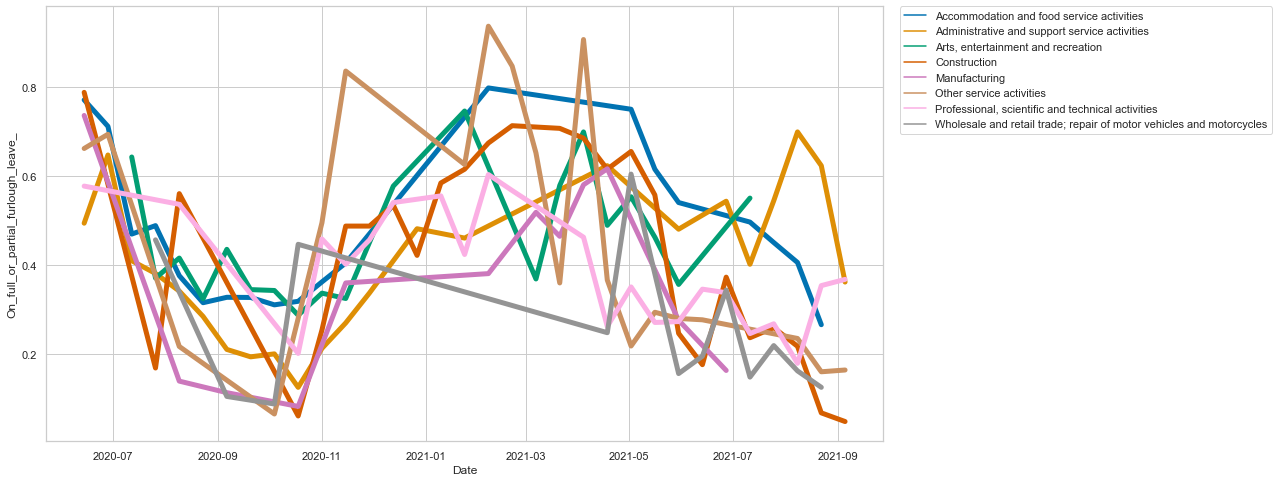

In [373]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=furg, x='Date', y='On_full_or_partial_furlough_leave_', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

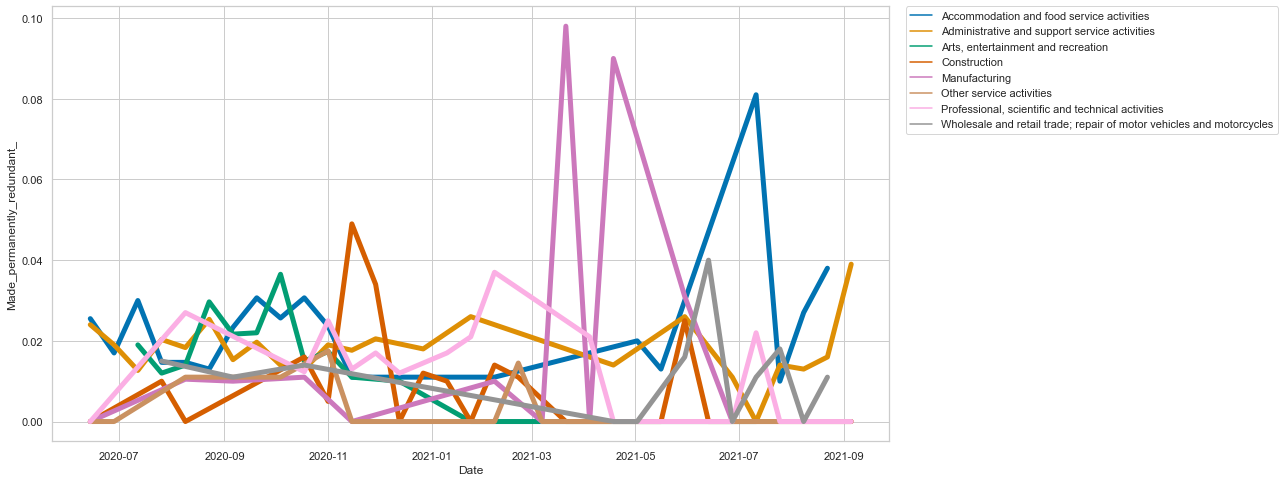

In [374]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=furg, x='Date', y='Made_permanently_redundant_', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [377]:
stock22 =  pd.read_excel('Stock 2022.xlsx')

In [379]:
stock22.columns = stock22.columns.str.replace(' ','_')

In [380]:
keep = stock22[(stock22['Industry/Size_Band']!= 'Manufacturing') &
          (stock22['Industry/Size_Band']!= 'Construction') &
          (stock22['Industry/Size_Band']!= "Wholesale and retail trade; repair of motor vehicles and motorcycles") &
          (stock22['Industry/Size_Band']!= 'Accommodation and food service activities') &
          (stock22['Industry/Size_Band']!= 'Professional, scientific and technical activities') &
          (stock22['Industry/Size_Band']!= 'Administrative and support service activities') &
          (stock22['Industry/Size_Band']!= 'Arts, entertainment and recreation') &
          (stock22['Industry/Size_Band']!= "Other service activities")].index

stock22 = stock22.drop(keep,inplace=False) 

In [381]:
stock22.head()

,Date,Wave,Trading_Status,Industry/Size_Band,Stock_levels_are_higher_than_normal,Stock_levels_have_not_changed_,Stock_levels_are_lower_than_normal_,Not_sure,Not_applicable_
0,2022-03-20,Wave 52,Not permanently stopped trading,Manufacturing,0.117,0.393,0.173,0.046,0.271
2,2022-03-20,Wave 52,Not permanently stopped trading,Construction,0.04,0.327,0.028,0.078,0.528
3,2022-03-20,Wave 52,Not permanently stopped trading,Wholesale and retail trade; repair of motor ve...,0.158,0.391,0.206,0.066,0.179
5,2022-03-20,Wave 52,Not permanently stopped trading,Accommodation and food service activities,0.063,0.413,0.257,0.093,0.174
8,2022-03-20,Wave 52,Not permanently stopped trading,"Professional, scientific and technical activities",0.01,0.112,0.013,0.016,0.848


In [382]:
stock22 = stock22[stock22.Stock_levels_are_lower_than_normal_ != "[c]"]


In [383]:
stock22g = stock22.groupby(['Industry/Size_Band', 'Date'], group_keys= False).mean()

C:\Users\Grace.Keen\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [384]:
stock22g = stock22g.reset_index(level=0)

In [385]:
stock22g = stock22g.reset_index(level=0)

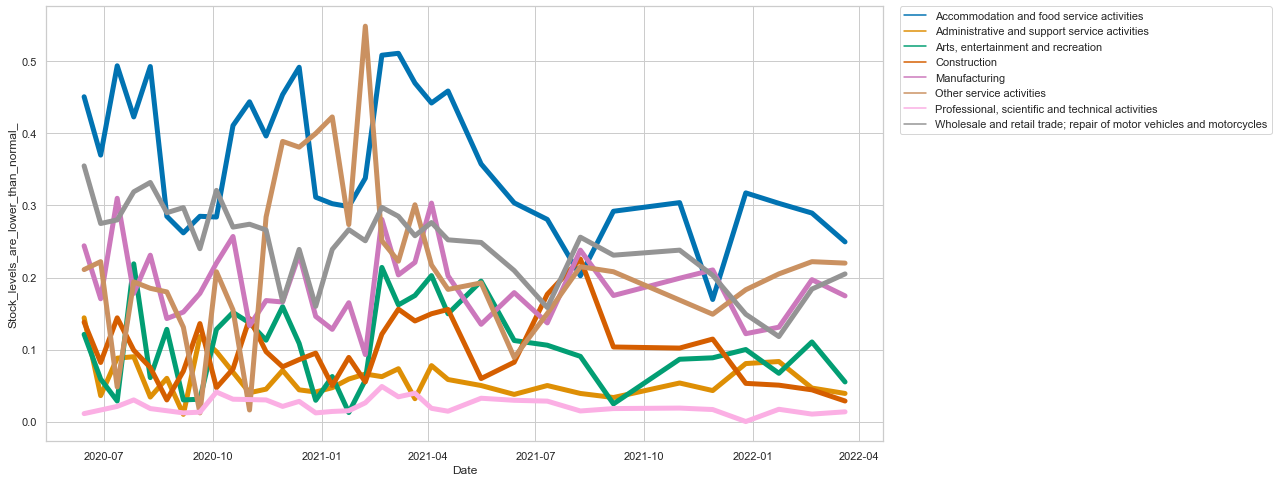

In [386]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=stock22g, x='Date', y='Stock_levels_are_lower_than_normal_', hue='Industry/Size_Band',palette=sns.color_palette('colorblind', n_colors=8), linewidth=5).set(title="")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)